## CROSSFOLD VALIDATION

In [182]:
x_train,x_test,y_train,y_test = train_test_split(features_scaled,target,test_size = 0.05,random_state = 121)

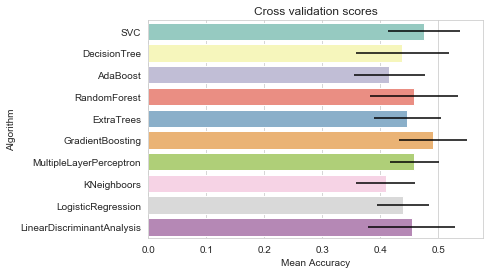

In [187]:
kfold = StratifiedKFold(n_splits=10)

random_state = 123
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())


cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, x_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")





### Model Ensembling
In statistics and machine learning, ensemble methods use multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone. 
We analyzed performance of 10 difference algorithm as listed below on our training dataset to understand best individual accuracy (parameters tuned using Grid search)

We got the best accuracy numbers around 45 to 50%, we then picked 3 algorithm that were least correlated - XGB, Random Forest and Linear Regression to create a simple voting ensembler.  By doing so we were able to increase the accuracy of the training dataset to 60%.


In [188]:
# Gradient boosting tuning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(x_train,y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    7.8s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   38.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:  2.6min finished


0.4762658227848101

## RESULTS 

#### Top 3 best models for given dataset

In [94]:
print("################### CATEGORICAL TARGET ##################\n")
results = pd.DataFrame({'Models':["XGBOOST - PARAMETER TUNNING ","XGBOOST-FEATURE SELECTION","SVM(RBF)-PCA"],'ValidationSet':["74.02%","70.59%","56.72%"],'TestSet':["56.76%","48.65%","50.0%"]})
print(results)
print("\n################## CONTINOUS TARGET ###################\n")
result_cont = pd.DataFrame({'Model':['Decision Tree - RMSE'],'ValidationSet':['15.3'],'TestSet':['9.4']})
print(result_cont)
print("\n########################################################\n")



################### CATEGORICAL TARGET ##################

                         Models ValidationSet TestSet
0  XGBOOST - PARAMETER TUNNING         74.02%  56.76%
1     XGBOOST-FEATURE SELECTION        70.59%  48.65%
2                  SVM(RBF)-PCA        56.72%   50.0%

################## CONTINOUS TARGET ###################

                  Model ValidationSet TestSet
0  Decision Tree - RMSE          15.3     9.4

########################################################



We used 7 different methods on our testing data set - Decision Tree, KNN, Random Forest, LR, XGB, RBF and multiple versions of Naive Bayes. Our three best models for training data based on accuracy obtained are shown above
We were able to achieve test accuracy of 61% using random forest which was close to what we were able to achieve on training dataset thus avoiding overfitting. 